In [49]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import keras
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time

import seaborn as sns
plt.style.use('seaborn')
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

# Importing Data:

In [50]:
df1 = pd.read_csv('Data\preprocessed_keppler_data(knn=5)(multilayer).csv')

#### ------- Creating helper functions for testing of the architectures: -------

In [51]:
#To get the dataset
def get_dataset():
    
    # Filtering the columns:
    X = df1.iloc[:, 0:-3].values
    y = df1.iloc[:, -3:].values
    
    return X, y

----------- Functions for the different architectures: -----------

In [52]:
#To get the model1
def get_model(n_inputs, n_outputs):
    model = Sequential()
     
    model.add(Dense(32, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

In [53]:
#To get the model
def get_model2(n_inputs, n_outputs):
    model = Sequential()
    
    model.add(layers.Dense(64, activation='relu', input_dim = n_inputs))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(n_outputs, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

In [54]:
#To get the model
def get_model3(n_inputs, n_outputs):
    model = Sequential()
    
    model.add(Dense(100, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

In [55]:
#To get the model
def get_model4(n_inputs, n_outputs):
    model = Sequential()
    
    model.add(layers.Dense(100, activation='relu', input_dim = n_inputs))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(n_outputs, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

---- Function for cross validation ---

In [56]:
#To evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y, model_function):
    seconds = list()
    results = list()
    result_training = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]    
    
    # define evaluation procedure (cross validation)
    cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
    
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        
        #print(train_ix, test_ix)
        
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        
        
        scaler = StandardScaler().fit(X_train)

        #Scaling:
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Time execution (start)
        start = time.time()
        
        # define model
        model = model_function(n_inputs, n_outputs)
        # fit model
        model.fit(X_train, y_train, verbose=0, epochs=100)
        
        # Time execution (end)
        end = time.time()
        seconds.append(end - start)
        
         # ------ make a prediction on the training set ------
        yhat = model.predict(X_train)
        # round probabilities to class labels
        yhat = yhat.round()
        # calculate accuracy
        acc = accuracy_score(y_train, yhat)
        
        # store result
        print('Training>%.3f' % acc)
        result_training.append(acc)
        
        # ------ make a prediction on the test set ------
        yhat = model.predict(X_test)
        # round probabilities to class labels
        yhat = yhat.round()
        # calculate accuracy
        acc = accuracy_score(y_test, yhat)
        
        # store result
        print('>%.3f' % acc)
        results.append(acc)
        
    return seconds, results, result_training

# Checking results per epoch:

We have different architectures to test the accuracy on:

In [57]:
X, y = get_dataset()

# Creating trainin, test and validation
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.2, random_state=1, stratify = y_train1)

# -- Scaling --
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5355, 26) (5355, 3)
(2869, 26) (2869, 3)


In [58]:
classifier = get_model(X_train.shape[1], y_train.shape[1])

history = classifier.fit( X_train, y_train, 
                          epochs=200, batch_size=200,
                          validation_data = (X_test, y_test) )

Epoch 1/200
27/27 [==============================] - 0s 11ms/step - loss: 0.8146 - accuracy: 0.4711 - val_loss: 0.7040 - val_accuracy: 0.5253
Epoch 2/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6514 - accuracy: 0.5686 - val_loss: 0.5752 - val_accuracy: 0.6051
Epoch 3/200
27/27 [==============================] - 0s 4ms/step - loss: 0.5471 - accuracy: 0.6388 - val_loss: 0.4952 - val_accuracy: 0.6654
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.6911 - val_loss: 0.4395 - val_accuracy: 0.7138
Epoch 5/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4300 - accuracy: 0.7350 - val_loss: 0.3969 - val_accuracy: 0.7605
Epoch 6/200
27/27 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.7668 - val_loss: 0.3627 - val_accuracy: 0.7822
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.7892 - val_loss: 0.3353 - val_accuracy: 0.7996
Epoch 8/200


Epoch 59/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1954 - accuracy: 0.8605 - val_loss: 0.1967 - val_accuracy: 0.8533
Epoch 60/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.8586 - val_loss: 0.1967 - val_accuracy: 0.8543
Epoch 61/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1950 - accuracy: 0.8616 - val_loss: 0.1965 - val_accuracy: 0.8533
Epoch 62/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1949 - accuracy: 0.8599 - val_loss: 0.1963 - val_accuracy: 0.8543
Epoch 63/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 0.8622 - val_loss: 0.1960 - val_accuracy: 0.8543
Epoch 64/200
27/27 [==============================] - 0s 5ms/step - loss: 0.1943 - accuracy: 0.8603 - val_loss: 0.1958 - val_accuracy: 0.8540
Epoch 65/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1939 - accuracy: 0.8624 - val_loss: 0.1957 - val_accuracy: 0.8547
Epoch 

27/27 [==============================] - 0s 3ms/step - loss: 0.1828 - accuracy: 0.8719 - val_loss: 0.1891 - val_accuracy: 0.8602
Epoch 117/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1824 - accuracy: 0.8713 - val_loss: 0.1891 - val_accuracy: 0.8606
Epoch 118/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.8702 - val_loss: 0.1888 - val_accuracy: 0.8609
Epoch 119/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1821 - accuracy: 0.8693 - val_loss: 0.1888 - val_accuracy: 0.8595
Epoch 120/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1818 - accuracy: 0.8706 - val_loss: 0.1888 - val_accuracy: 0.8609
Epoch 121/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1815 - accuracy: 0.8717 - val_loss: 0.1886 - val_accuracy: 0.8595
Epoch 122/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1812 - accuracy: 0.8710 - val_loss: 0.1888 - val_accuracy: 0.8602
Epoch 123/200

27/27 [==============================] - 0s 3ms/step - loss: 0.1717 - accuracy: 0.8768 - val_loss: 0.1866 - val_accuracy: 0.8658
Epoch 174/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1716 - accuracy: 0.8771 - val_loss: 0.1866 - val_accuracy: 0.8658
Epoch 175/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.8781 - val_loss: 0.1866 - val_accuracy: 0.8679
Epoch 176/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1715 - accuracy: 0.8775 - val_loss: 0.1865 - val_accuracy: 0.8665
Epoch 177/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.8762 - val_loss: 0.1866 - val_accuracy: 0.8665
Epoch 178/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1713 - accuracy: 0.8773 - val_loss: 0.1865 - val_accuracy: 0.8655
Epoch 179/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1708 - accuracy: 0.8775 - val_loss: 0.1863 - val_accuracy: 0.8658
Epoch 180/200

In [59]:
classifier2 = get_model2(X_train.shape[1], y_train.shape[1])

history2 = classifier2.fit( X_train, y_train, 
                          epochs=200, batch_size=200,
                          validation_data = (X_test, y_test) )

Epoch 1/200
27/27 [==============================] - 0s 10ms/step - loss: 0.9195 - accuracy: 0.5251 - val_loss: 0.6829 - val_accuracy: 0.6783
Epoch 2/200
27/27 [==============================] - 0s 4ms/step - loss: 0.5869 - accuracy: 0.7425 - val_loss: 0.4869 - val_accuracy: 0.7944
Epoch 3/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4451 - accuracy: 0.8148 - val_loss: 0.3973 - val_accuracy: 0.8194
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3818 - accuracy: 0.8291 - val_loss: 0.3578 - val_accuracy: 0.8303
Epoch 5/200
27/27 [==============================] - 0s 4ms/step - loss: 0.3497 - accuracy: 0.8431 - val_loss: 0.3368 - val_accuracy: 0.8372
Epoch 6/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3315 - accuracy: 0.8514 - val_loss: 0.3252 - val_accuracy: 0.8421
Epoch 7/200
27/27 [==============================] - 0s 4ms/step - loss: 0.3212 - accuracy: 0.8553 - val_loss: 0.3187 - val_accuracy: 0.8449
Epoch 8/200


Epoch 59/200
27/27 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 0.9008 - val_loss: 0.2819 - val_accuracy: 0.8672
Epoch 60/200
27/27 [==============================] - 0s 4ms/step - loss: 0.2186 - accuracy: 0.9012 - val_loss: 0.2859 - val_accuracy: 0.8658
Epoch 61/200
27/27 [==============================] - 0s 4ms/step - loss: 0.2162 - accuracy: 0.9012 - val_loss: 0.2802 - val_accuracy: 0.8703
Epoch 62/200
27/27 [==============================] - 0s 3ms/step - loss: 0.2159 - accuracy: 0.9007 - val_loss: 0.2860 - val_accuracy: 0.8658
Epoch 63/200
27/27 [==============================] - 0s 3ms/step - loss: 0.2152 - accuracy: 0.9029 - val_loss: 0.2796 - val_accuracy: 0.8721
Epoch 64/200
27/27 [==============================] - 0s 3ms/step - loss: 0.2130 - accuracy: 0.9042 - val_loss: 0.2829 - val_accuracy: 0.8675
Epoch 65/200
27/27 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.9027 - val_loss: 0.2940 - val_accuracy: 0.8658
Epoch 

27/27 [==============================] - 0s 3ms/step - loss: 0.1662 - accuracy: 0.9283 - val_loss: 0.3110 - val_accuracy: 0.8634
Epoch 117/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1692 - accuracy: 0.9246 - val_loss: 0.3138 - val_accuracy: 0.8665
Epoch 118/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1699 - accuracy: 0.9264 - val_loss: 0.3130 - val_accuracy: 0.8655
Epoch 119/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1649 - accuracy: 0.9287 - val_loss: 0.3130 - val_accuracy: 0.8602
Epoch 120/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1637 - accuracy: 0.9320 - val_loss: 0.3126 - val_accuracy: 0.8641
Epoch 121/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1638 - accuracy: 0.9324 - val_loss: 0.3143 - val_accuracy: 0.8651
Epoch 122/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1664 - accuracy: 0.9287 - val_loss: 0.3157 - val_accuracy: 0.8641
Epoch 123/200

27/27 [==============================] - 0s 4ms/step - loss: 0.1345 - accuracy: 0.9445 - val_loss: 0.3640 - val_accuracy: 0.8599
Epoch 174/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1325 - accuracy: 0.9438 - val_loss: 0.3570 - val_accuracy: 0.8637
Epoch 175/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1317 - accuracy: 0.9468 - val_loss: 0.3658 - val_accuracy: 0.8578
Epoch 176/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1324 - accuracy: 0.9457 - val_loss: 0.3572 - val_accuracy: 0.8616
Epoch 177/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1265 - accuracy: 0.9501 - val_loss: 0.3622 - val_accuracy: 0.8609
Epoch 178/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1242 - accuracy: 0.9496 - val_loss: 0.3659 - val_accuracy: 0.8606
Epoch 179/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1238 - accuracy: 0.9528 - val_loss: 0.3687 - val_accuracy: 0.8627
Epoch 180/200

In [60]:
classifier3 = get_model(X_train.shape[1], y_train.shape[1])

history3 = classifier3.fit( X_train, y_train, 
                          epochs=200, batch_size=200,
                          validation_data = (X_test, y_test) )

Epoch 1/200
27/27 [==============================] - 0s 9ms/step - loss: 0.8220 - accuracy: 0.3475 - val_loss: 0.7092 - val_accuracy: 0.4280
Epoch 2/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.5070 - val_loss: 0.5644 - val_accuracy: 0.5939
Epoch 3/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5210 - accuracy: 0.6504 - val_loss: 0.4744 - val_accuracy: 0.7069
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.7227 - val_loss: 0.4138 - val_accuracy: 0.7574
Epoch 5/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.7557 - val_loss: 0.3708 - val_accuracy: 0.7766
Epoch 6/200
27/27 [==============================] - 0s 4ms/step - loss: 0.3579 - accuracy: 0.7767 - val_loss: 0.3394 - val_accuracy: 0.7884
Epoch 7/200
27/27 [==============================] - 0s 4ms/step - loss: 0.3299 - accuracy: 0.7899 - val_loss: 0.3159 - val_accuracy: 0.7978
Epoch 8/200
2

Epoch 59/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1929 - accuracy: 0.8639 - val_loss: 0.1952 - val_accuracy: 0.8585
Epoch 60/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1926 - accuracy: 0.8654 - val_loss: 0.1950 - val_accuracy: 0.8578
Epoch 61/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1922 - accuracy: 0.8644 - val_loss: 0.1948 - val_accuracy: 0.8588
Epoch 62/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.8646 - val_loss: 0.1948 - val_accuracy: 0.8592
Epoch 63/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1918 - accuracy: 0.8641 - val_loss: 0.1944 - val_accuracy: 0.8599
Epoch 64/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 0.8637 - val_loss: 0.1943 - val_accuracy: 0.8592
Epoch 65/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 0.8641 - val_loss: 0.1942 - val_accuracy: 0.8578
Epoch 

27/27 [==============================] - 0s 3ms/step - loss: 0.1797 - accuracy: 0.8704 - val_loss: 0.1879 - val_accuracy: 0.8599
Epoch 117/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1794 - accuracy: 0.8706 - val_loss: 0.1880 - val_accuracy: 0.8599
Epoch 118/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.8713 - val_loss: 0.1877 - val_accuracy: 0.8592
Epoch 119/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1793 - accuracy: 0.8710 - val_loss: 0.1878 - val_accuracy: 0.8606
Epoch 120/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1792 - accuracy: 0.8700 - val_loss: 0.1875 - val_accuracy: 0.8613
Epoch 121/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.8726 - val_loss: 0.1875 - val_accuracy: 0.8602
Epoch 122/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1787 - accuracy: 0.8723 - val_loss: 0.1873 - val_accuracy: 0.8602
Epoch 123/200

27/27 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.8773 - val_loss: 0.1847 - val_accuracy: 0.8714
Epoch 174/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.8788 - val_loss: 0.1843 - val_accuracy: 0.8679
Epoch 175/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1707 - accuracy: 0.8782 - val_loss: 0.1845 - val_accuracy: 0.8655
Epoch 176/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1707 - accuracy: 0.8773 - val_loss: 0.1846 - val_accuracy: 0.8630
Epoch 177/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1705 - accuracy: 0.8782 - val_loss: 0.1841 - val_accuracy: 0.8651
Epoch 178/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1702 - accuracy: 0.8786 - val_loss: 0.1845 - val_accuracy: 0.8710
Epoch 179/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1704 - accuracy: 0.8766 - val_loss: 0.1843 - val_accuracy: 0.8655
Epoch 180/200

In [61]:
classifier4 = get_model(X_train.shape[1], y_train.shape[1])

history4 = classifier4.fit( X_train, y_train, 
                          epochs=200, batch_size=200,
                          validation_data = (X_test, y_test) )

Epoch 1/200
27/27 [==============================] - 0s 10ms/step - loss: 0.8824 - accuracy: 0.4006 - val_loss: 0.7638 - val_accuracy: 0.4942
Epoch 2/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.5602 - val_loss: 0.5982 - val_accuracy: 0.6382
Epoch 3/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.6717 - val_loss: 0.4932 - val_accuracy: 0.7079
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.7287 - val_loss: 0.4256 - val_accuracy: 0.7473
Epoch 5/200
27/27 [==============================] - 0s 4ms/step - loss: 0.3993 - accuracy: 0.7582 - val_loss: 0.3788 - val_accuracy: 0.7741
Epoch 6/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3599 - accuracy: 0.7763 - val_loss: 0.3453 - val_accuracy: 0.7926
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.7922 - val_loss: 0.3206 - val_accuracy: 0.8034
Epoch 8/200


Epoch 59/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1949 - accuracy: 0.8644 - val_loss: 0.1961 - val_accuracy: 0.8522
Epoch 60/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1947 - accuracy: 0.8652 - val_loss: 0.1961 - val_accuracy: 0.8501
Epoch 61/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.8648 - val_loss: 0.1956 - val_accuracy: 0.8522
Epoch 62/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.8644 - val_loss: 0.1956 - val_accuracy: 0.8522
Epoch 63/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1939 - accuracy: 0.8652 - val_loss: 0.1953 - val_accuracy: 0.8540
Epoch 64/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1935 - accuracy: 0.8652 - val_loss: 0.1954 - val_accuracy: 0.8526
Epoch 65/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1932 - accuracy: 0.8644 - val_loss: 0.1951 - val_accuracy: 0.8533
Epoch 

27/27 [==============================] - 0s 3ms/step - loss: 0.1815 - accuracy: 0.8710 - val_loss: 0.1894 - val_accuracy: 0.8578
Epoch 117/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1812 - accuracy: 0.8702 - val_loss: 0.1895 - val_accuracy: 0.8588
Epoch 118/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1810 - accuracy: 0.8721 - val_loss: 0.1894 - val_accuracy: 0.8585
Epoch 119/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1809 - accuracy: 0.8715 - val_loss: 0.1895 - val_accuracy: 0.8585
Epoch 120/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1807 - accuracy: 0.8717 - val_loss: 0.1892 - val_accuracy: 0.8581
Epoch 121/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1805 - accuracy: 0.8704 - val_loss: 0.1894 - val_accuracy: 0.8585
Epoch 122/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1804 - accuracy: 0.8723 - val_loss: 0.1892 - val_accuracy: 0.8592
Epoch 123/200

27/27 [==============================] - 0s 4ms/step - loss: 0.1709 - accuracy: 0.8809 - val_loss: 0.1863 - val_accuracy: 0.8669
Epoch 174/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1709 - accuracy: 0.8786 - val_loss: 0.1860 - val_accuracy: 0.8672
Epoch 175/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1707 - accuracy: 0.8788 - val_loss: 0.1861 - val_accuracy: 0.8641
Epoch 176/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.8797 - val_loss: 0.1855 - val_accuracy: 0.8658
Epoch 177/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1703 - accuracy: 0.8796 - val_loss: 0.1860 - val_accuracy: 0.8641
Epoch 178/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1701 - accuracy: 0.8814 - val_loss: 0.1859 - val_accuracy: 0.8662
Epoch 179/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1700 - accuracy: 0.8799 - val_loss: 0.1857 - val_accuracy: 0.8651
Epoch 180/200

# Graphs:

In [62]:
def valgraph(history, Title):
    # Epoch graphs:
    history_dict = history.history 
    acc = history_dict['accuracy']

    training_acc = history_dict['accuracy'] 
    val_acc = history_dict['val_accuracy'] 
    epochs = range(1, len(acc) + 1) 

    plt.plot( epochs, training_acc, '-', label = 'Training Acc', color='r' )
    plt.plot( epochs, val_acc, 'b', label = 'Validation Acc' )
    plt.title( Title ) 
    plt.xlabel( 'Epochs' ) 
    plt.ylabel( 'Acc' ) 
    plt.legend() 
    plt.show()

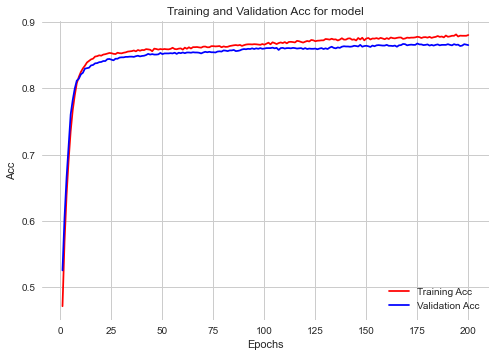

In [63]:
valgraph(history, 'Training and Validation Acc for model')

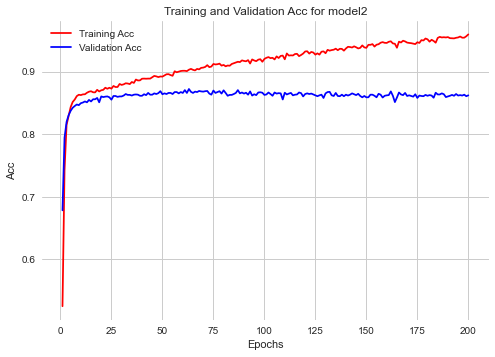

In [64]:
valgraph(history2, 'Training and Validation Acc for model2')

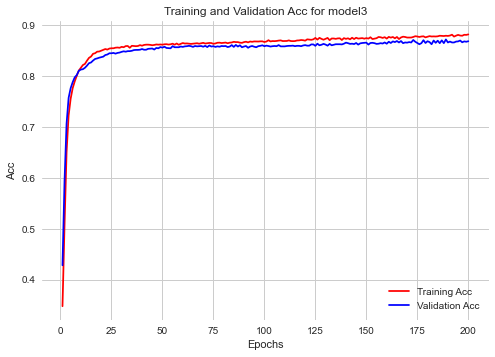

In [65]:
valgraph(history3, 'Training and Validation Acc for model3')

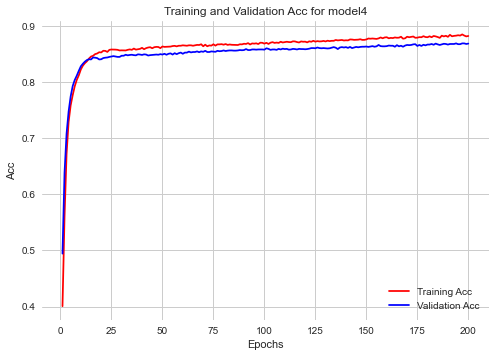

In [66]:
valgraph(history4, 'Training and Validation Acc for model4')

# Cross Validation:

In [67]:
#To load dataset
X, y = get_dataset()
# evaluate model
seconds0 , results0, training0 = evaluate_model(X, y, get_model)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results0), std(results0)))
print('Execution time: %.3f (%.3f)' % (mean(seconds0), std(seconds0)))
print('Training: %.3f (%.3f)' % (mean(training0), std(training0)))

Training>0.878
>0.864
Training>0.875
>0.846
Training>0.875
>0.855
Training>0.877
>0.833
Training>0.874
>0.866
Training>0.871
>0.867
Training>0.867
>0.871
Training>0.870
>0.846
Training>0.875
>0.864
Training>0.875
>0.842
Accuracy: 0.855 (0.012)
Execution time: 24.369 (1.831)
Training: 0.874 (0.003)


In [68]:
#To load dataset
X, y = get_dataset()
# evaluate model
seconds2 , results2, training2 = evaluate_model(X, y, get_model2)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results2), std(results2)))
print('Execution time: %.3f (%.3f)' % (mean(seconds2), std(seconds2)))
print('Training: %.3f (%.3f)' % (mean(training2), std(training2)))

resultsm2=pd.DataFrame(np.array([[mean(results2), std(results2)], [mean(seconds2), std(seconds2)], [mean(training2), std(training2)]]),\
                   columns=['mean', 'std deviation'], index=['accuracy','execution time','training'])
resultsm2

Training>0.943
>0.855
Training>0.948
>0.867
Training>0.944
>0.854
Training>0.946
>0.864
Training>0.956
>0.872
Training>0.947
>0.867
Training>0.932
>0.881
Training>0.947
>0.868
Training>0.950
>0.856
Training>0.941
>0.845
Accuracy: 0.863 (0.010)
Execution time: 23.875 (0.329)
Training: 0.946 (0.006)


,mean,std deviation
accuracy,0.862910,0.009963
execution time,23.875495,0.329099
training,0.945519,0.006001


In [ ]:
#To load dataset
X, y = get_dataset()
# evaluate model
seconds3 , results3, training3 = evaluate_model(X, y, get_model3)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results3), std(results3)))
print('Execution time: %.3f (%.3f)' % (mean(seconds3), std(seconds3)))
print('Training: %.3f (%.3f)' % (mean(training3), std(training3)))

Training>0.983
>0.862
Training>0.980
>0.858
Training>0.976
>0.827
Training>0.978
>0.841


In [ ]:
resultsm3=pd.DataFrame(np.array([[mean(results3), std(results3)], [mean(seconds3), std(seconds3)], [mean(training3), std(training3)]]),\
                   columns=['mean', 'std deviation'], index=['accuracy','execution time','training'])
resultsm3

In [ ]:
#To load dataset
X, y = get_dataset()
# evaluate model
seconds4 , results4, training4 = evaluate_model(X, y, get_model4)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results4), std(results4)))
print('Execution time: %.3f (%.3f)' % (mean(seconds4), std(seconds4)))
print('Training: %.3f (%.3f)' % (mean(training4), std(training4)))

In [ ]:
resultsm4=pd.DataFrame(np.array([[mean(results4), std(results4)], [mean(seconds4), std(seconds4)], [mean(training4), std(training4)]]),\
                   columns=['mean', 'std deviation'], index=['accuracy','execution time','training'])
resultsm4

### Assessment

By looking at the kfolds cross validation, the best architecture seems to be get_model2. Nevertheless, we have overfitting.

Let's use dropout and L2 regularization to limit overfitting.

In [ ]:
#To get the model
def get_model2_dropout(n_inputs, n_outputs):
    model = Sequential()
    
    model.add(layers.Dense(64, activation='relu', input_dim = n_inputs))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(n_outputs, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

In [ ]:
classifier2d = get_model2_dropout(X_train.shape[1], y_train.shape[1])

history2d = classifier2d.fit( X_train, y_train, 
                          epochs=200, batch_size=200,
                          validation_data = (X_test, y_test) )

In [ ]:
valgraph(history2d, 'Training and Validation Acc for model2_Dropout')

In [ ]:
#To load dataset
X, y = get_dataset()
# evaluate model
seconds2drop , results2drop, training2drop = evaluate_model(X, y, get_model2_dropout)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results2drop), std(results2drop)))
print('Execution time: %.3f (%.3f)' % (mean(seconds2drop), std(seconds2drop)))
print('Training: %.3f (%.3f)' % (mean(training2drop), std(training2drop)))

Above we have a great result for the multilayer clasification problem, with a model not prone to overfitting.

In [ ]:
resultsm2d=pd.DataFrame(np.array([[mean(results2drop), std(results2drop)], [mean(seconds2drop), std(seconds2drop)], [mean(training2drop), std(training2drop)]]),\
                   columns=['mean', 'std deviation'], index=['accuracy','execution time','training'])
resultsm2d

In [ ]:
#To get the model
def get_model2_reg(n_inputs, n_outputs):
    model = Sequential()
    
    model.add(layers.Dense(64, kernel_regularizer = regularizers.l2(0.01), activation='relu', input_dim = n_inputs))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, kernel_regularizer = regularizers.l2(0.01), activation='relu'))
    #model.add(layers.Dropout(0.3))
    model.add(layers.Dense(n_outputs, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

In [ ]:
classifier2reg = get_model2_reg(X_train.shape[1], y_train.shape[1])

history2reg = classifier2reg.fit( X_train, y_train, 
                          epochs=200, batch_size=200,
                          validation_data = (X_test, y_test) )

In [ ]:
valgraph(history2reg, 'Training and Validation Acc for model2_reg')

In [ ]:
#To load dataset
X, y = get_dataset()
# evaluate model
secondsreg , resultsreg, trainingreg = evaluate_model(X, y, get_model2_reg)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(resultsreg), std(resultsreg)))
print('Execution time: %.3f (%.3f)' % (mean(secondsreg), std(secondsreg)))
print('Training: %.3f (%.3f)' % (mean(trainingreg), std(trainingreg)))

In [ ]:
resultsm2r=pd.DataFrame(np.array([[mean(resultsreg), std(resultsreg)], [mean(secondsreg), std(secondsreg)], [mean(trainingreg), std(trainingreg)]]),\
                   columns=['mean', 'std deviation'], index=['accuracy','execution time','training'])
resultsm2r

# Getting the results for analysis:

Let's get a dataframe with the results:

In [ ]:
df_results = pd.DataFrame( data = {'model': ['model0' for i in range(10)],
                                   'seconds': seconds0,
                                   'trainingacc': training0,
                                   'valacc': results0})

for time, result, trn, name in zip([seconds2, seconds3, seconds4, seconds2drop, secondsreg], 
                                   [results2, results3, results4, results2drop, trainingreg],
                                   [training2, training3, training4, training2drop, resultsreg],
                                   ['model2', 'model3', 'model4', 'model2_dropout', 'model2_reg']):
    
    df_results = df_results.append(
        pd.DataFrame( data = {'model': [name for i in range(10)],
                              'seconds': time,
                              'trainingacc': trn,
                              'valacc': result}) )

In [ ]:
df_results.to_csv('Data\multilayer_results.csv', index=False)

In [ ]:
df_results.groupby(by='model').agg({'std','mean'})